In [1]:
import pandas as pd

# Load Dataset

In [2]:
train = pd.read_csv("../../../data/bike/train.csv", parse_dates=["datetime"])

print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("../../../data/bike/test.csv", parse_dates=["datetime"])

print(test.shape)

test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


# Preprocessing

### Parse datetime

In [4]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)

train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", 
      "datetime-second", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [5]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)

test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", 
      "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


# Explore

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

### datetime

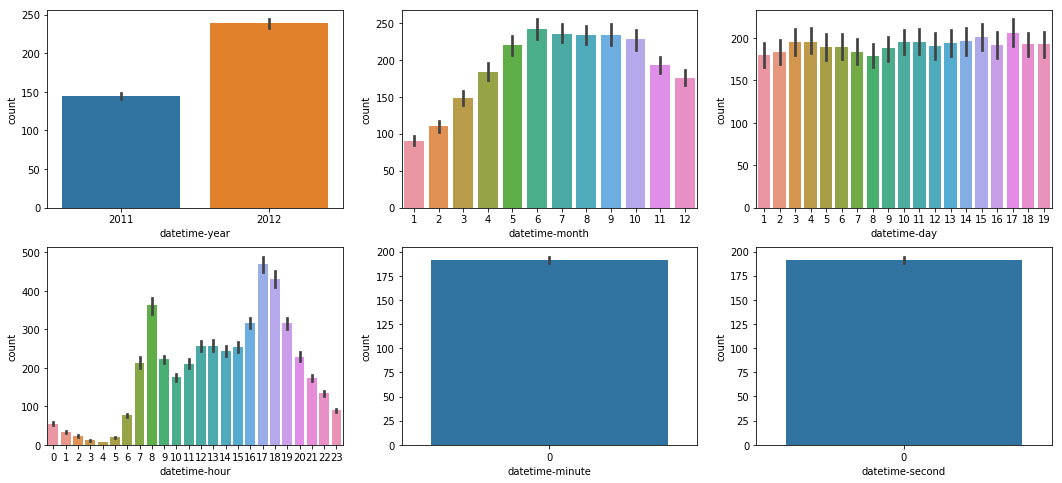

In [7]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

### datetime-year & datetime-month

In [8]:
train["datetime-year(str)"] = train["datetime-year"].astype('str')
train["datetime-month(str)"] = train["datetime-month"].astype('str')

train["datetime-year-month"] = train["datetime-year(str)"] + '-' + train["datetime-month(str)"]

print(train.shape)

train[["datetime", "datetime-year-month"]].head()

(10886, 22)


,datetime,datetime-year-month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


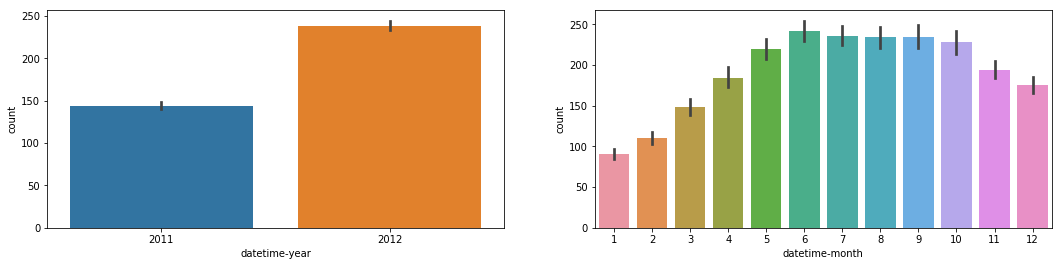

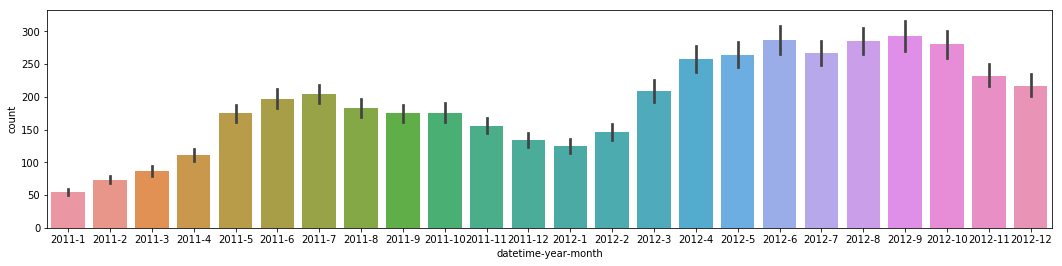

In [10]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year-month", y="count", ax=ax3)

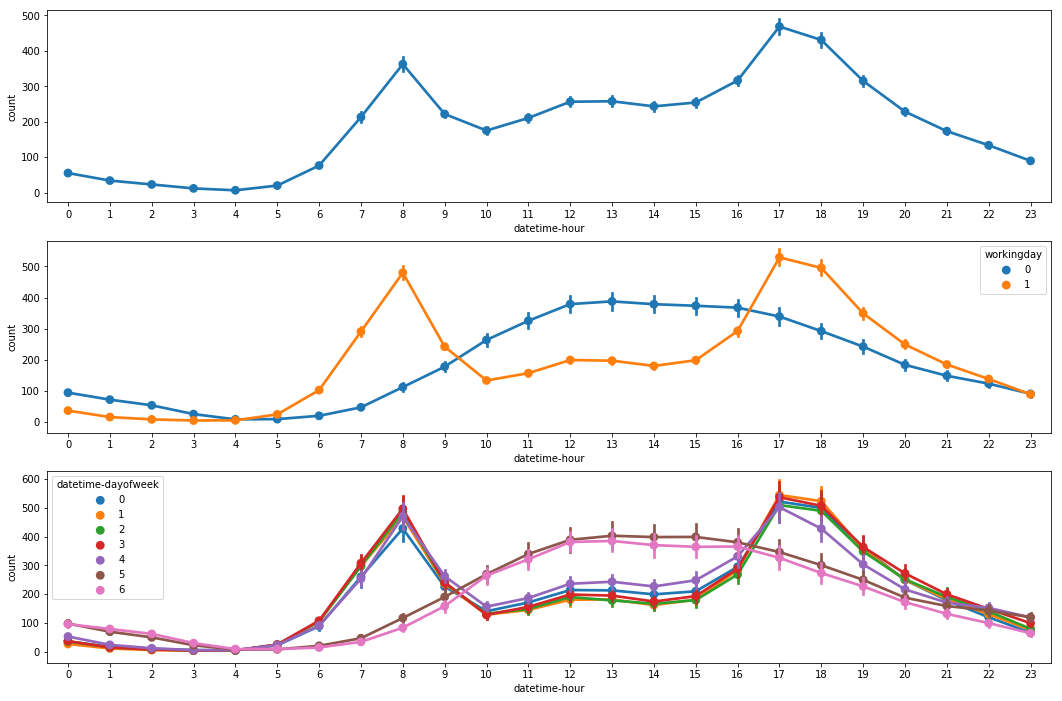

In [11]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax3)

### count

/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


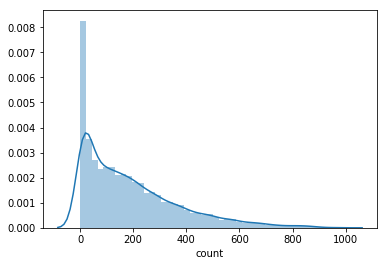

In [13]:
sns.distplot(train["count"])

In [15]:
import numpy as np

train["log_count"] = np.log(train["count"] + 1)

print(train.shape)

train[["count", "log_count"]].head()

(10886, 23)


,count,log_count
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


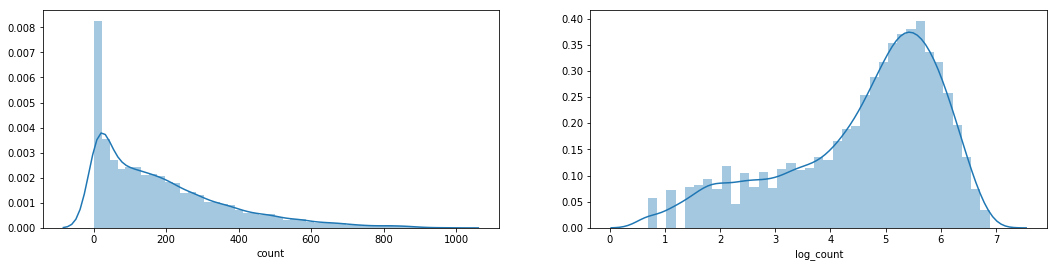

In [16]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.distplot(train["count"], ax=ax1)

sns.distplot(train["log_count"], ax=ax2)

In [17]:
train["count(recover)"] = np.exp(train["log_count"]) - 1

print(train.shape)

train[["count", "log_count", "count(recover)"]].head()

(10886, 24)


,count,log_count,count(recover)
0,16,2.833213,16.0
1,40,3.713572,40.0
2,32,3.496508,32.0
3,13,2.639057,13.0
4,1,0.693147,1.0


/usr/local/var/pyenv/versions/3.6.5/envs/dsschool/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


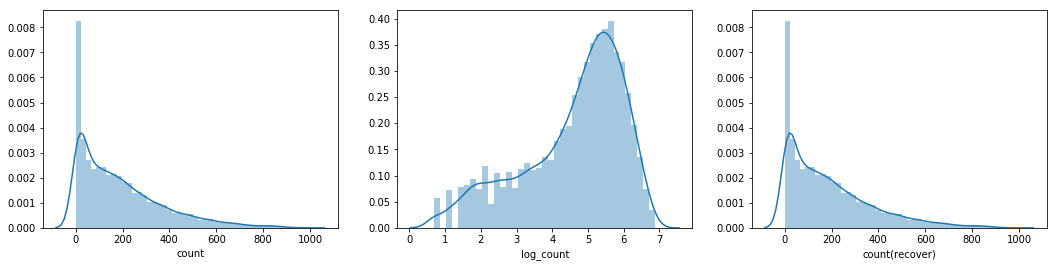

In [19]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

figure.set_size_inches(18, 4)

sns.distplot(train["count"], ax=ax1)

sns.distplot(train["log_count"], ax=ax2)

sns.distplot(train["count(recover)"], ax=ax3)

# Train

In [20]:
feature_names = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed",
                "datetime-year", "datetime-hour", "datetime-dayofweek"]

feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [21]:
label_name = "log_count"

label_name

'log_count'

In [22]:
X_train = train[feature_names]

print(X_train.shape)

X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [24]:
X_test = test[feature_names]

print(X_test.shape)

X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [25]:
y_train = train[label_name]

print(y_train.shape)

y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log_count, dtype: float64

# Evaluate

In [26]:
import numpy as np

from sklearn.metrics import make_scorer

def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    distance = predict - actual
    
    square_distance = distance ** 2
    
    mean_square_distance = square_distance.mean()
    
    score = np.sqrt(mean_square_distance)
    
    return score

rmse_score = make_scorer(rmse)
rmse_score

make_scorer(rmse)

# Hyperparameter Tuning

In [27]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Case 1 - Grid Search

In [28]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

n_estimators = 300

max_depth_list = [10, 20, 30, 40, 50, 60, 70, 80, 90]

max_features_list = [0.1, 0.3, 0.5, 0.7, 0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth=max_depth,
                                     max_features=max_features,
                                     n_jobs=-1,
                                     random_state=37)
        
        score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
        
        hyperparameters = {
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        }
        
        hyperparameters_list.append(hyperparameters)
        
        print(f"n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, score = {score:.5f}")

        
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)

hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)

hyperparameters_list.head()
        

n_estimators = 300, max_depth = 10, max_features = 0.100000, score = 0.69444
n_estimators = 300, max_depth = 10, max_features = 0.300000, score = 0.50294
n_estimators = 300, max_depth = 10, max_features = 0.500000, score = 0.42195
n_estimators = 300, max_depth = 10, max_features = 0.700000, score = 0.39184
n_estimators = 300, max_depth = 10, max_features = 0.900000, score = 0.37997
n_estimators = 300, max_depth = 20, max_features = 0.100000, score = 0.58596
n_estimators = 300, max_depth = 20, max_features = 0.300000, score = 0.42647
n_estimators = 300, max_depth = 20, max_features = 0.500000, score = 0.36706
n_estimators = 300, max_depth = 20, max_features = 0.700000, score = 0.35216
n_estimators = 300, max_depth = 20, max_features = 0.900000, score = 0.34927
n_estimators = 300, max_depth = 30, max_features = 0.100000, score = 0.58252
n_estimators = 300, max_depth = 30, max_features = 0.300000, score = 0.42589
n_estimators = 300, max_depth = 30, max_features = 0.500000, score = 0.36729

,max_depth,max_features,n_estimators,score
9,20,0.9,300,0.34927
24,50,0.9,300,0.34972
29,60,0.9,300,0.34972
34,70,0.9,300,0.34972
44,90,0.9,300,0.34972


### Coarse Search

In [33]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

n_estimators = 300

num_epoch = 100

coarse_hyperparameters_list = []


for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    
    max_features = np.random.uniform(low=0.1, high=1.0)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features,
                                 n_jobs=-1,
                                 random_state=37)
    
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }
    
    coarse_hyperparameters_list.append(hyperparameters)
    
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")
    
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

print(coarse_hyperparameters_list.shape)

coarse_hyperparameters_list.head(10)

 0 n_estimators = 300, max_depth = 32, max_features = 0.991181, Score = 0.35059
 1 n_estimators = 300, max_depth = 47, max_features = 0.975444, Score = 0.35063
 2 n_estimators = 300, max_depth = 42, max_features = 0.873112, Score = 0.34972
 3 n_estimators = 300, max_depth = 91, max_features = 0.132512, Score = 0.58331
 4 n_estimators = 300, max_depth = 18, max_features = 0.163214, Score = 0.58677
 5 n_estimators = 300, max_depth = 22, max_features = 0.225324, Score = 0.49171
 6 n_estimators = 300, max_depth =  4, max_features = 0.566746, Score = 0.67700
 7 n_estimators = 300, max_depth = 13, max_features = 0.379753, Score = 0.40521
 8 n_estimators = 300, max_depth = 23, max_features = 0.459344, Score = 0.36701
 9 n_estimators = 300, max_depth = 52, max_features = 0.869661, Score = 0.34972
10 n_estimators = 300, max_depth = 75, max_features = 0.264990, Score = 0.49269
11 n_estimators = 300, max_depth =  5, max_features = 0.605547, Score = 0.60578
12 n_estimators = 300, max_depth = 54, m

,epoch,max_depth,max_features,n_estimators,score
67,67,19,0.825573,300,0.349474
57,57,34,0.844080,300,0.349709
21,21,91,0.838894,300,0.349720
35,35,67,0.885015,300,0.349720
2,2,42,0.873112,300,0.349720
95,95,98,0.870420,300,0.349720
17,17,67,0.883258,300,0.349720
87,87,93,0.870582,300,0.349720
9,9,52,0.869661,300,0.349720
72,72,95,0.861314,300,0.349720


### Finer Search

In [34]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

n_estimators = 300

num_epoch = 100

finer_hyperparameters_list = []

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=40, high=100)
    
    max_features = np.random.uniform(low=0.6, high=1.0)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features,
                                 n_jobs=-1,
                                 random_state=37)
    
    score = cross_val_score(model, X_train, y_train, cv=20, scoring=rmse_score).mean()
    
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }
    
    finer_hyperparameters_list.append(hyperparameters)
    
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")
    
finer_hyperparameters_list = pd.DataFrame.from_dict(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by="score")

print(finer_hyperparameters_list.shape)

finer_hyperparameters_list.head(10)

In [ ]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_max_depth = best_hyperparameters["max_depth"]

best_max_features = best_hyperparameters["max_features"]

print(f"max_depth(best) = {best_max_depth}, max_features(best) = {best_max_features:.6f}")

# Use Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

best_n_estimators = 3000

best_max_depth = 83
best_max_features = 0.851358

model = RandomForestRegressor(n_estimators=best_n_estimators,
                             max_depth=best_max_depth,
                             max_features=best_max_features,
                             random_state=37,
                             n_jobs=-1)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

# Fit

In [49]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

# Predict

In [50]:
log_predictions = model.predict(X_test)

print(log_predictions.shape)

log_predictions

(6493,)


array([2.51350713, 1.73330699, 1.41848543, ..., 4.59957903, 4.58914414,
       3.87335626])

In [51]:
predictions = np.exp(log_predictions) - 1

print(predictions.shape)

predictions

(6493,)


array([11.34816083,  4.65933836,  3.13085924, ..., 98.44244437,
       97.4101687 , 47.1035637 ])

# Submit

In [53]:
submission = pd.read_csv("../../../data/bike/sampleSubmission.csv")

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [54]:
submission["count"] = predictions

print(submission.shape)

submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.348161
1,2011-01-20 01:00:00,4.659338
2,2011-01-20 02:00:00,3.130859
3,2011-01-20 03:00:00,3.274112
4,2011-01-20 04:00:00,2.688771


In [55]:
submission.to_csv("../../../data/bike/random-forest_0.39138.csv", index=False)